# NBA Rookie Sophomore Machine Learning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.patches as mpatches

In [2]:
# Read the csv file into a pandas DataFrame

training_df = pd.read_csv('Resources/2015-18_training_dataset.csv')
training_df.dropna(inplace=True)

# Train Model with previous 4 draft classes

In [3]:
# Assign the data to X and y
X = training_df[['Y1-STL_per36', 'Y1-PTS_per36', 'Y1-AST_per36', 'Y1-TS%', 'Y1-BLK_per36', 'Y1-TRB_per36']]
y = training_df['Y2-BPM']

In [4]:
# Create the model
model = LinearRegression()

In [5]:
# Fit the model to the training data. 
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_pred = model.predict(X)

In [7]:
# Score the predictions with mse and r2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5.557129324098728
R-squared (R2 ): 0.26144699292223206


# Predict 2019-20 Rookie Class Sophomore BPM

In [8]:
predict_df = pd.read_csv('Resources/current_rookies_test_data.csv')
predict_df.dropna(inplace=True)
predict_df
X2 = predict_df[['Y1-STL_per36', 'Y1-PTS_per36', 'Y1-AST_per36', 'Y1-TS%', 'Y1-BLK_per36', 'Y1-TRB_per36']]
y2 = predict_df['Y2-BPM']

y_pred2 = model.predict(X2)
y_pred2

#mse = mean_squared_error(y2, y_pred2)
#r2 = r2_score(y2, y_pred2)

#print(f"Mean Squared Error (MSE): {mse}")
#print(f"R-squared (R2 ): {r2}")


array([-2.70326325,  0.97701103, -2.54956417, -1.48776744, -2.36629028,
       -1.97802768, -1.31658629, -2.86913494, -2.8156245 , -2.14065873,
       -1.76328684, -3.07478638,  1.1172953 , -1.77504163, -2.88121638,
       -1.84300495,  0.83783096, -2.25695969, -2.62381438, -1.75762921,
       -3.73443281, -0.6700954 ,  0.10890489,  0.46162618, -2.58116394,
       -1.48941809, -0.75269905, -3.44815236, -3.47210547, -2.44340815,
       -4.3739314 , -1.53293554, -2.0615163 , -2.32877148])

In [9]:
predict_df['Predict-Y2-BPM'] = y_pred2

In [10]:
predict_df_clean = round(predict_df.filter(['Player','Y1-BPM','Predict-Y2-BPM']),1)

predict_df_clean['BPM_Differential'] = round(predict_df_clean['Y1-BPM'].sub(predict_df_clean['Predict-Y2-BPM'], axis = 0),1)

predict_df_clean

,Player,Y1-BPM,Predict-Y2-BPM,BPM_Differential
0,De'Andre Hunter,-4.7,-2.7,-2.0
1,Ja Morant,0.2,1.0,-0.8
2,Darius Garland,-5.6,-2.5,-3.1
3,P.J. Washington,-1.6,-1.5,-0.1
4,RJ Barrett,-4.3,-2.4,-1.9
5,Coby White,-2.8,-2.0,-0.8
6,Eric Paschall,-2.7,-1.3,-1.4
7,Cam Reddish,-4.2,-2.9,-1.3
8,Jarrett Culver,-4.0,-2.8,-1.2
9,Tyler Herro,-2.2,-2.1,-0.1


# 2019-20 NBA Rookie Class year-over-year BPM Visualization

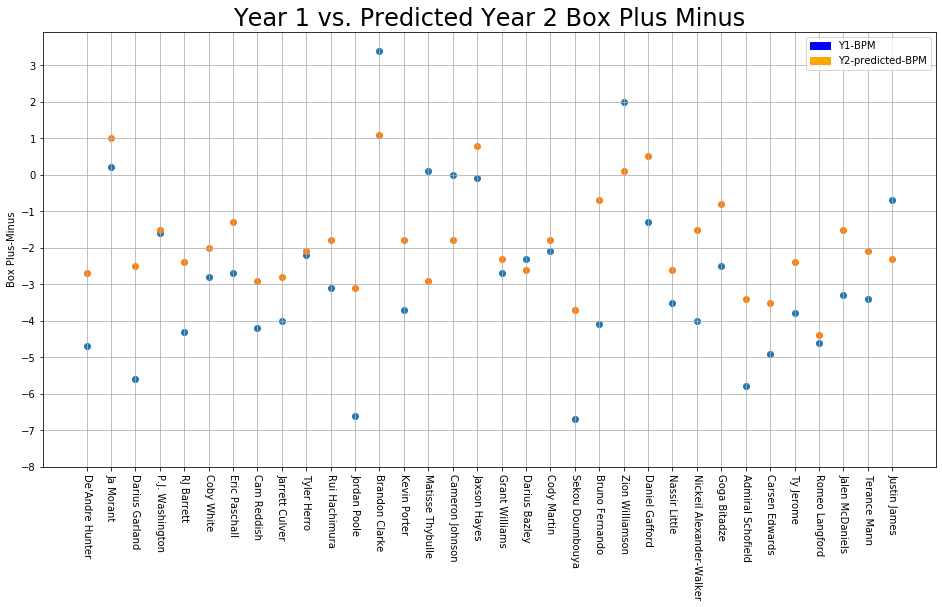

In [12]:
import matplotlib.patches as mpatches

plt.scatter(predict_df_clean["Player"],predict_df_clean["Y1-BPM"])
plt.scatter(predict_df_clean["Player"],predict_df_clean["Predict-Y2-BPM"])
plt.xticks(rotation=270)
plt.ylabel("Box Plus-Minus")
blue_patch = mpatches.Patch(color='blue', label='Y1-BPM')
orange_patch = mpatches.Patch(color='orange', label='Y2-predicted-BPM')
plt.legend(handles=[blue_patch,orange_patch])
y = range(-8,4,1)
y_ticks = np.arange(-8, 4, 1)
plt.yticks(y_ticks)
plt.title("Year 1 vs. Predicted Year 2 Box Plus Minus",size = 24)
plt.rcParams["figure.figsize"] = (16,8)
plt.grid()
plt.savefig("Predicted_BPM")